
### Fashion **MNIST**
>
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.


To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

*  0 T-shirt/top8
*  1 Trouser
*  2 Pullover
*  3 Dress
*  4 Coat
*  5 Sandal
*  6 Shirt
*  7 Sneaker
*  8 Bag
*  9 Ankle boot



In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#Mapping the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
x_val,y_val = x_train[0:15000],y_train[0:15000]
print("x_val shape:",x_val.shape,"y_shape:",y_val.shape)

x_val shape: (15000, 28, 28) y_shape: (15000,)


PRE Processing EDA

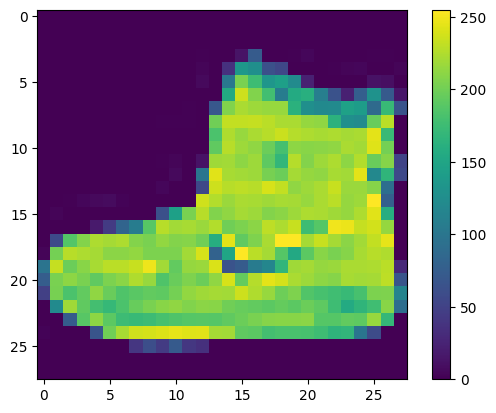

In [5]:
#plotting first image of train data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

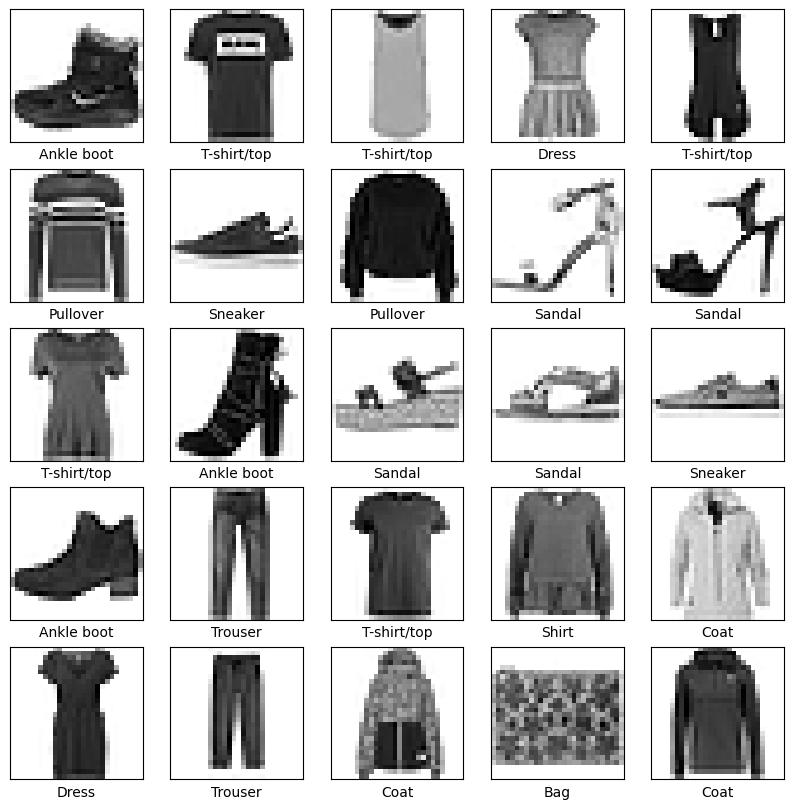

In [6]:
#Plotting first 25 images from train.csv
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
#converting np array into df
train_images = np.reshape(x_train,(60000,784))
import pandas as pd
dataf = pd.DataFrame(train_images)


In [8]:
input_data = dataf.iloc[:,:] / 255
input_data.head()


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

from __future__ import print_function
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [10]:
# Give multiple pixel columns one name: features
features = [i for i in range(input_data.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(input_data, columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = y_train

print('Size of the dataframe: {}'.format(pca_df.shape))

Size of the dataframe: (60000, 785)


In [11]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results
pca_df['result'] = results

In [12]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,result
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top


In [13]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [14]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29039228 0.1775531  0.06019222]


Append the three dimensional PCA values as columns to the pca_df dataframe, naming them First Dimension, Second Dimension, and Third Dimension.

In [15]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1]
pca_df['Third Dimension'] = pca_result[:,2]

Text(0.5, 0.98, '3-Component PCA')

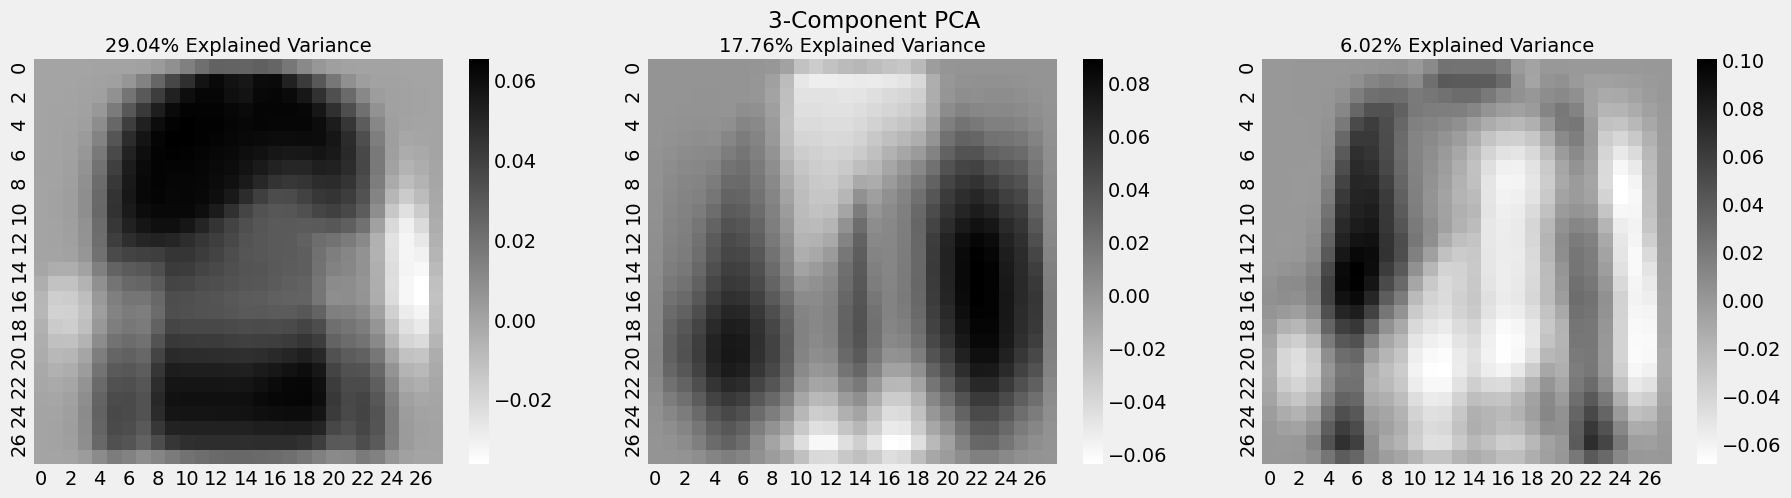

In [16]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
# Add picture title
plt.suptitle('3-Component PCA')

In [17]:
# initializing the pca
# Set n_components as 784 dimensions
pca = decomposition.PCA(n_components = 784)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)

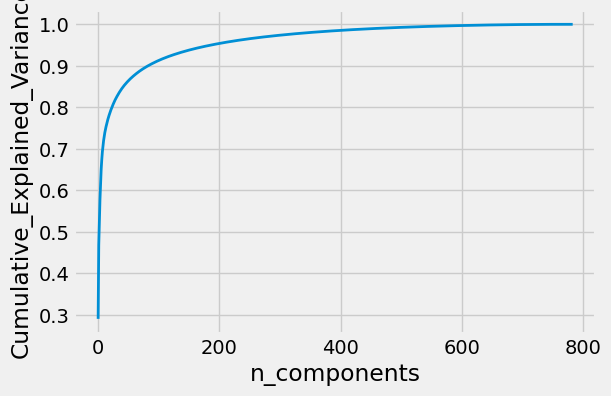

In [18]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

<Axes: xlabel='First Dimension', ylabel='Second Dimension'>

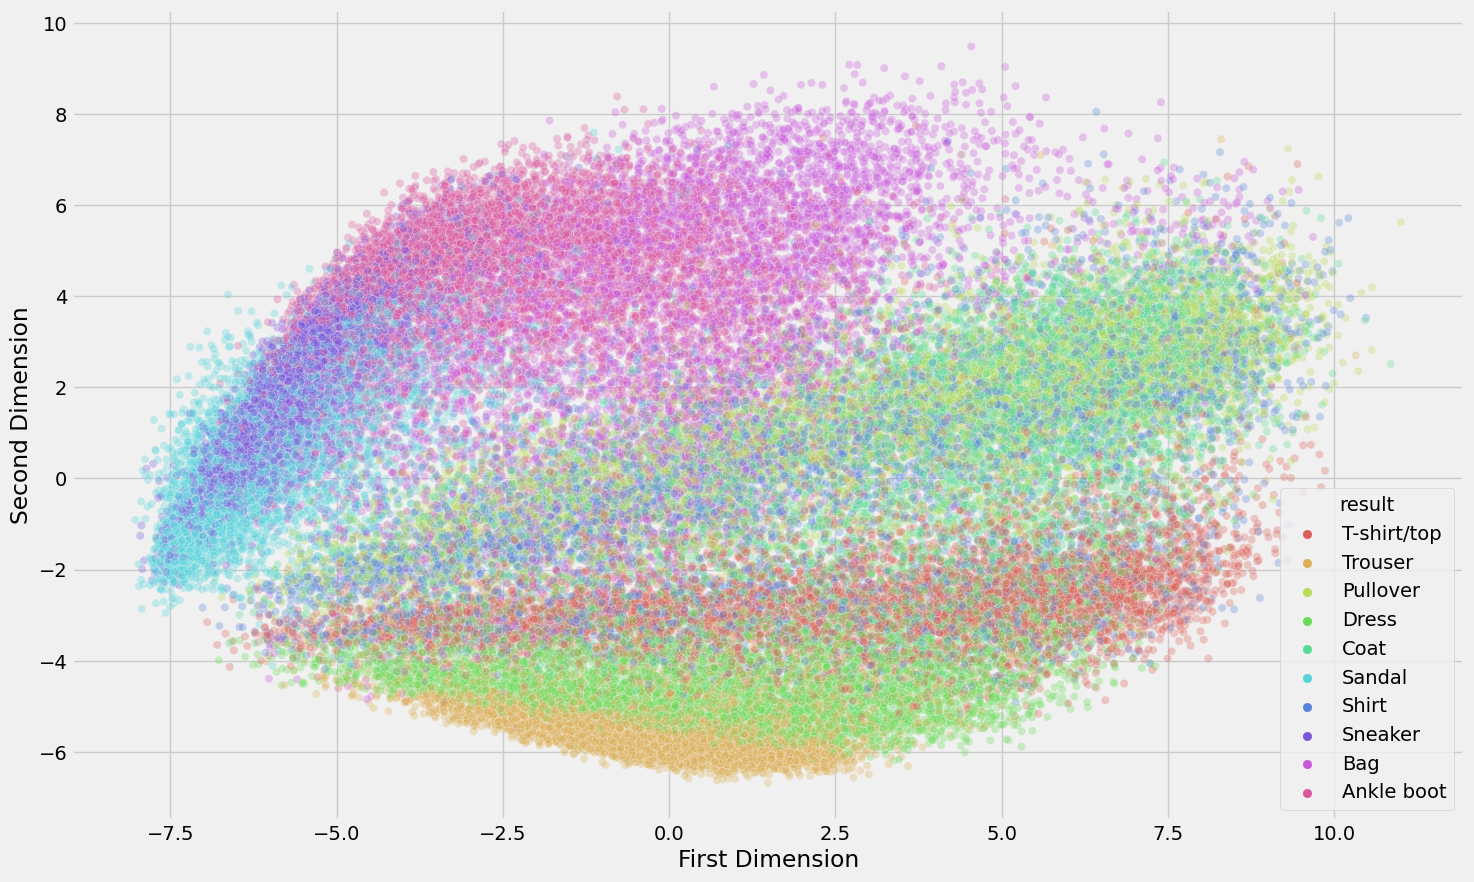

In [19]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

From the graph above, we can see the two components can separate different categories apart to some degree, but the separation is not clear enough. Let's take a look at the three-dimensional representation.

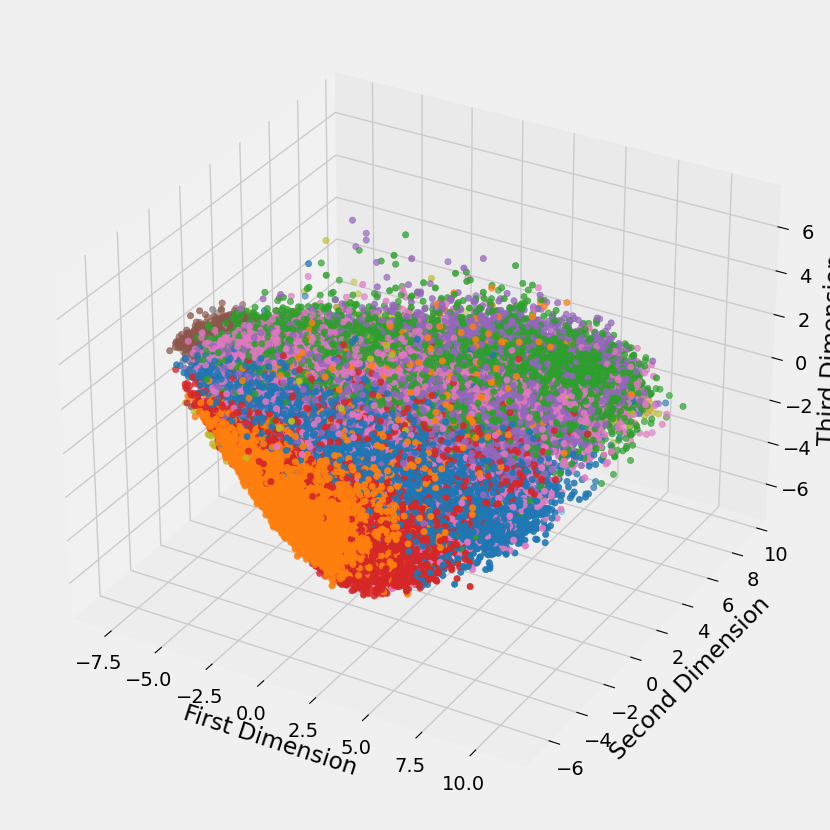

In [20]:
graph = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"],
    ys=pca_df["Second Dimension"],
    zs=pca_df["Third Dimension"],
    c=pca_df["label"],
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# *PART1 *
* Quadratic intensity
* Rotation
* Mirroring
* Random cropping
* Color Shifting

# **Quadratic intensity**
We first convert the pixel values to float and scale them to the range [0, 1].
Then, we apply a quadratic scaling by squaring each pixel value.
Finally, we clip the values to ensure they remain in the valid range [0, 1].

In [21]:

import numpy as np

# Perform quadratic intensity scaling on the validation set
x_val_scaled = x_val.astype(np.float32) / 255.0  # Scale the pixel values to the range [0, 1]
x_val_scaled = x_val_scaled ** 2  # Apply quadratic scaling

# Ensure the pixel values are still in the valid range [0, 1]
x_val_scaled = np.clip(x_val_scaled, 0, 1)

# Print the shape of the scaled validation set
print("Shape of the scaled validation set:", x_val_scaled.shape)


Shape of the scaled validation set: (15000, 28, 28)


# **Mirroring**

In [22]:
import numpy as np

# Mirror (flip) the validation images horizontally
mirrored_x_val = np.array([np.fliplr(img) for img in x_val])

# Print the shape of the mirrored validation set
print("Shape of the mirrored validation set:", mirrored_x_val.shape)

Shape of the mirrored validation set: (15000, 28, 28)


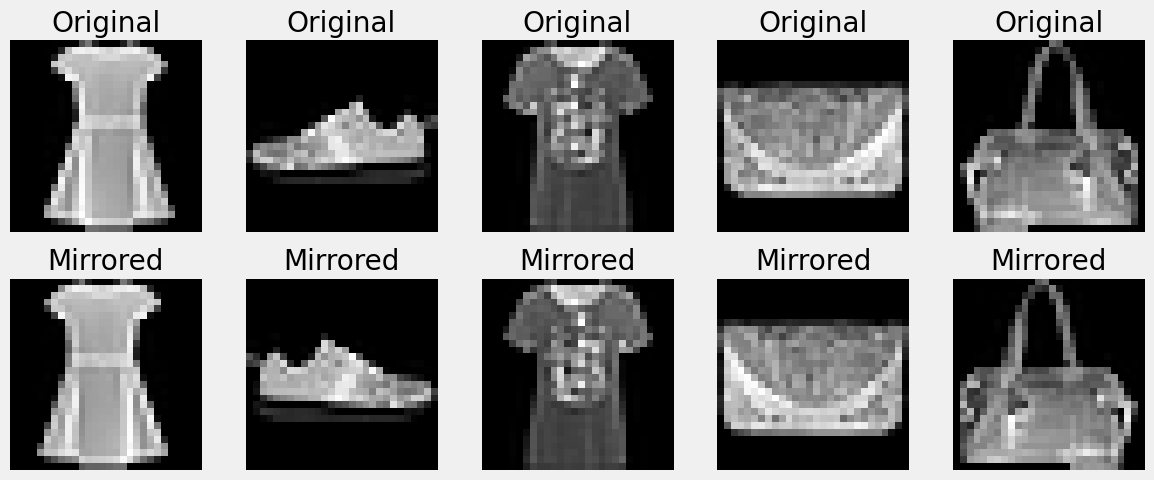

In [23]:


# Randomly select some indices to visualize
indices_to_visualize = np.random.randint(0, len(x_val), 5)

# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the original images
for i, idx in enumerate(indices_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[idx], cmap='gray')
    plt.title("Original")
    plt.axis('off')

# Plot the mirrored images
for i, idx in enumerate(indices_to_visualize):
    plt.subplot(2, 5, i + 6)
    plt.imshow(mirrored_x_val[idx], cmap='gray')
    plt.title("Mirrored")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Rotation**

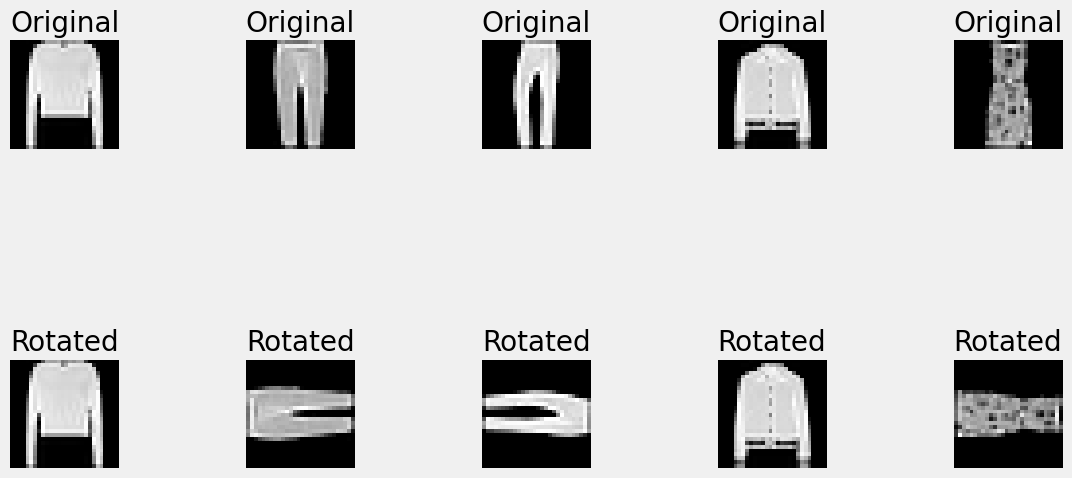

In [24]:
import random

# Function to horizontally mirror (flip) an image
def mirror_image(image):
    return np.fliplr(image)

# Function to rotate an image
def rotate_image(image, angle):
    return np.rot90(image, k=angle // 90)

# Randomly select some indices to visualize
indices_to_visualize = random.sample(range(len(x_val)), 5)

# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the original and rotated images
for i, idx in enumerate(indices_to_visualize):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_val[idx], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(3, 5, i + 11)
    rotation_angle = random.randint(0, 360)
    plt.imshow(rotate_image(x_val[idx], rotation_angle), cmap='gray')
    plt.title("Rotated")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Random Cropping**

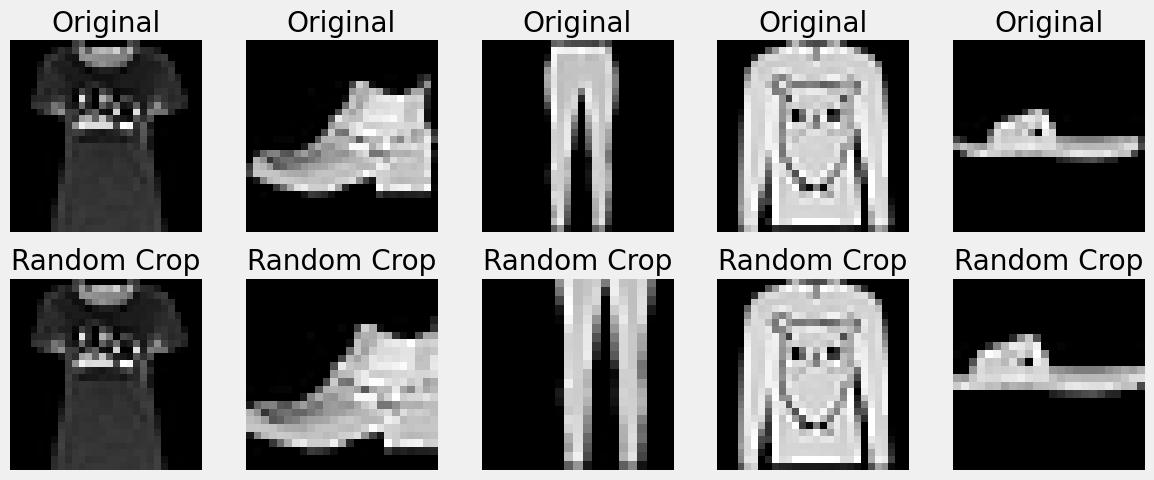

In [25]:
# Randomly select some indices to visualize
indices_to_visualize = random.sample(range(len(x_val)), 5)

# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the original and randomly cropped images
for i, idx in enumerate(indices_to_visualize):
    original_image = x_val[idx]
    crop_size = random.randint(20, 28)  # Random crop size between 20 and 28 pixels
    top = random.randint(0, 28 - crop_size)
    left = random.randint(0, 28 - crop_size)
    cropped_image = original_image[top:top+crop_size, left:left+crop_size]

    plt.subplot(2, 5, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(cropped_image, cmap='gray')
    plt.title("Random Crop")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Color Shifting**

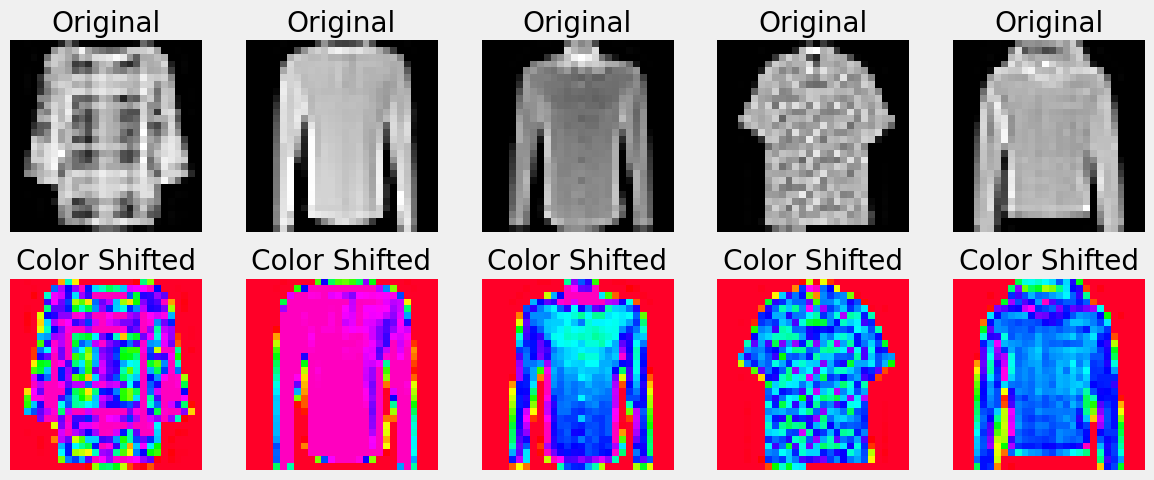

In [26]:
import cv2
# Randomly select some indices to visualize
indices_to_visualize = random.sample(range(len(x_val)), 5)

# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the original and color-shifted images
for i, idx in enumerate(indices_to_visualize):
    original_image = x_val[idx]
    brightness_factor = random.uniform(0.5, 1.5)  # Random brightness factor between 0.5 and 1.5
    contrast_factor = random.uniform(0.5, 1.5)  # Random contrast factor between 0.5 and 1.5

    shifted_image = cv2.convertScaleAbs(original_image, alpha=contrast_factor, beta=brightness_factor)

    plt.subplot(2, 5, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(shifted_image, cmap='gist_rainbow')
    plt.title("Color Shifted")
    plt.axis('off')


plt.tight_layout()
plt.show()

# **PART 2 **

In [27]:
import numpy as np
import cv2
import random

# Define functions for transformations

def mirror_image(image):
    return np.fliplr(image)

def rotate_image(image, angle):
    return np.rot90(image, k=angle // 90)

def random_crop(image, crop_size):
    height, width = image.shape
    top = random.randint(0, height - crop_size)
    left = random.randint(0, width - crop_size)
    return image[top:top+crop_size, left:left+crop_size]

# Apply transformations to the validation dataset
transformed_x_val = []

for img in x_val:
    # Apply mirroring with 50% probability
    if random.random() > 0.5:
        img = mirror_image(img)

    # Apply rotation with random angle between -30 and 30 degrees
    rotation_angle = random.randint(-30, 30)
    img = rotate_image(img, rotation_angle)

    # Apply random cropping with random crop size between 20 and 28 pixels
    crop_size = random.randint(20, 28)
    img = random_crop(img, crop_size)

    transformed_x_val.append(img)

# Convert the list of transformed images back to a NumPy array
transformed_x_val = np.array(transformed_x_val)

# Print the shape of the transformed validation set
print("Shape of the transformed validation set:", transformed_x_val.shape)


Shape of the transformed validation set: (15000,)


<ipython-input-27-04f0b77618ec>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  transformed_x_val = np.array(transformed_x_val)


In [28]:
import numpy as np
import cv2

common_shape = (28, 28)  # Adjust this to your desired shape
resized_transformed_x_val = [cv2.resize(img, common_shape) for img in transformed_x_val]
resized_transformed_x_val = np.array(resized_transformed_x_val)
combined_x_train = np.concatenate((x_train, resized_transformed_x_val), axis=0)
combined_y_train = np.concatenate((y_train, y_val), axis=0)

# Print the shape of the combined dataset and labels
print("Shape of the combined_x_train:", combined_x_train.shape)
print("Shape of the combined_y_train:", combined_y_train.shape)

Shape of the combined_x_train: (75000, 28, 28)
Shape of the combined_y_train: (75000,)


In [29]:
print(x_train)
print(combined_x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# Load your dataset and preprocess it if necessary
# Replace 'x_train', 'y_train', 'x_val', 'y_val', 'x_test', and 'y_test' with your data

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
938/938 [==============================] - 81s 85ms/step - loss: 1.4908 - accuracy: 0.6762 - val_loss: 0.4871 - val_accuracy: 0.8283
Epoch 2/10
938/938 [==============================] - 79s 84ms/step - loss: 0.5785 - accuracy: 0.7834 - val_loss: 0.3918 - val_accuracy: 0.8521
Epoch 3/10
938/938 [==============================] - 84s 89ms/step - loss: 0.5050 - accuracy: 0.8120 - val_loss: 0.3705 - val_accuracy: 0.8605
Epoch 4/10
938/938 [==============================] - 79s 85ms/step - loss: 0.4579 - accuracy: 0.8299 - val_loss: 0.3174 - val_accuracy: 0.8867
Epoch 5/10
938/938 [==============================] - 77s 82ms/step - loss: 0.4283 - accuracy: 0.8448 - val_loss: 0.3067 - val_accuracy: 0.8868
Epoch 6/10
938/938 [==============================] - 76s 81ms/step - loss: 0.4047 - accuracy: 0.8515 - val_loss: 0.2988 - val_accuracy: 0.8822
Epoch 7/10
938/938 [==============================] - 77s 82ms/step - loss: 0.3851 - accuracy: 0.8573 - val_loss: 0.2614 - val_accuracy:

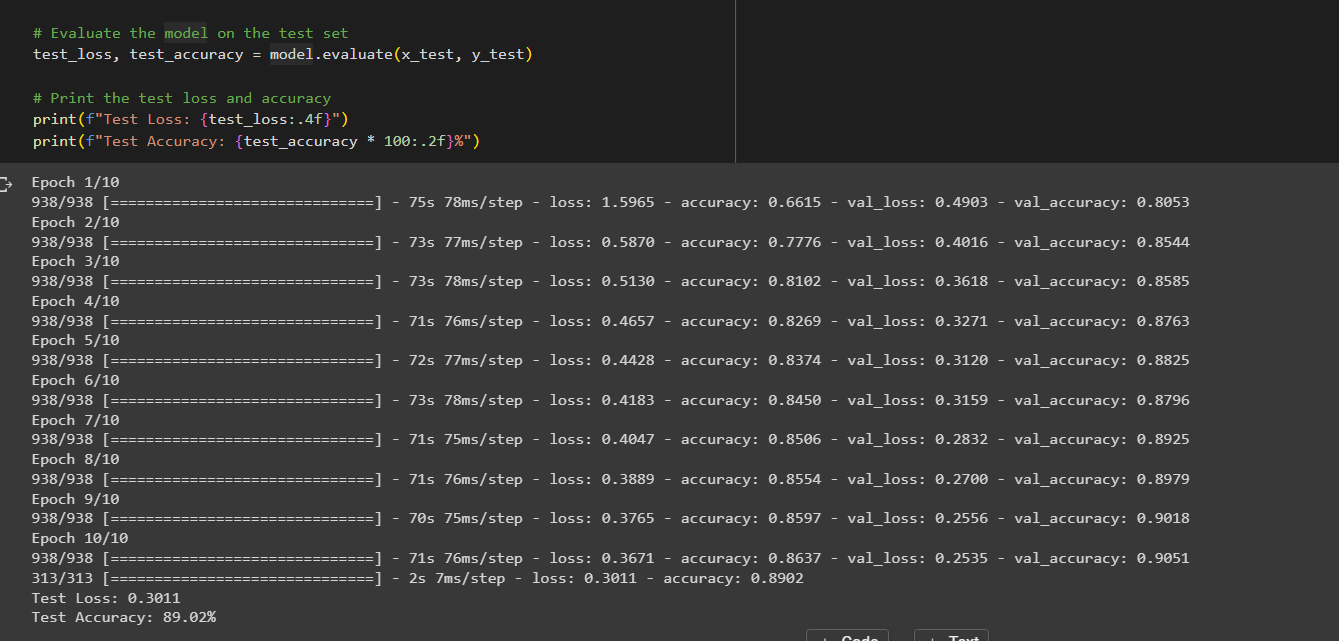

In [31]:
# Train the model with combined dataset
combined_model = model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.5610 - accuracy: 0.7988 - val_loss: 0.2522 - val_accuracy: 0.9044
Epoch 2/10
1172/1172 [==============================] - 95s 81ms/step - loss: 0.4914 - accuracy: 0.8216 - val_loss: 0.2345 - val_accuracy: 0.9100
Epoch 3/10
1172/1172 [==============================] - 99s 84ms/step - loss: 0.4682 - accuracy: 0.8300 - val_loss: 0.2298 - val_accuracy: 0.9156
Epoch 4/10
1172/1172 [==============================] - 104s 89ms/step - loss: 0.4530 - accuracy: 0.8348 - val_loss: 0.2213 - val_accuracy: 0.9145
Epoch 5/10
1172/1172 [==============================] - 94s 80ms/step - loss: 0.4428 - accuracy: 0.8380 - val_loss: 0.2178 - val_accuracy: 0.9215
Epoch 6/10
1172/1172 [==============================] - 95s 81ms/step - loss: 0.4295 - accuracy: 0.8410 - val_loss: 0.2166 - val_accuracy: 0.9225
Epoch 7/10
1172/1172 [==============================] - 93s 79ms/step - loss: 0.4256 - accuracy: 0.8441 - val_loss: 0.2076 

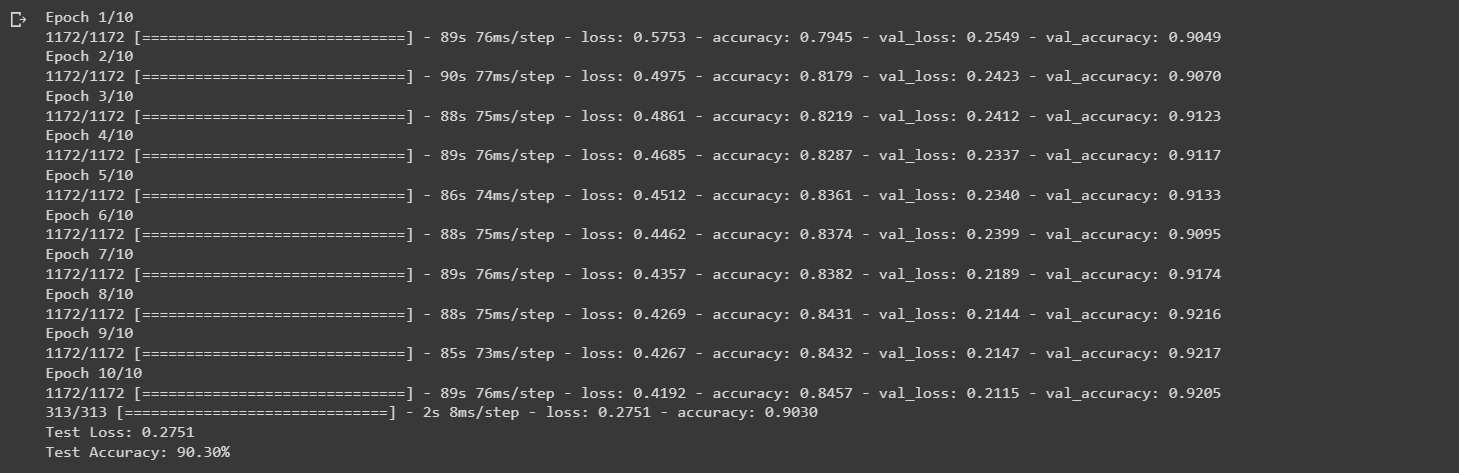

This was  the model with combined  dataset


# **Now PART 3**

In [32]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [33]:
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

In [34]:
# Train the model with reduce_lr
combined_model_rlr = model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val),callbacks = reduce_lr)

Epoch 1/10
1172/1172 [==============================] - 96s 82ms/step - loss: 0.4073 - accuracy: 0.8504 - val_loss: 0.1988 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 2/10
1172/1172 [==============================] - 91s 78ms/step - loss: 0.4030 - accuracy: 0.8512 - val_loss: 0.1971 - val_accuracy: 0.9272 - lr: 0.0010
Epoch 3/10
1172/1172 [==============================] - 94s 80ms/step - loss: 0.3933 - accuracy: 0.8561 - val_loss: 0.1880 - val_accuracy: 0.9321 - lr: 0.0010
Epoch 4/10
1172/1172 [==============================] - 93s 79ms/step - loss: 0.3908 - accuracy: 0.8552 - val_loss: 0.1928 - val_accuracy: 0.9265 - lr: 0.0010
Epoch 5/10
1172/1172 [==============================] - 95s 81ms/step - loss: 0.3870 - accuracy: 0.8575 - val_loss: 0.1936 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 6/10
1172/1172 [==============================] - 95s 81ms/step - loss: 0.3859 - accuracy: 0.8581 - val_loss: 0.1967 - val_accuracy: 0.9271 - lr: 0.0010
Epoch 7/10
1172/1172 [========================

In [35]:
# Train the model with early stopping
combined_model_rlr = model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val),callbacks = earlystop)

Epoch 1/10
1172/1172 [==============================] - 108s 92ms/step - loss: 0.3777 - accuracy: 0.8607 - val_loss: 0.1855 - val_accuracy: 0.9323
Epoch 2/10
1172/1172 [==============================] - 100s 86ms/step - loss: 0.3756 - accuracy: 0.8626 - val_loss: 0.1887 - val_accuracy: 0.9333
Epoch 3/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.3712 - accuracy: 0.8641 - val_loss: 0.1795 - val_accuracy: 0.9307
Epoch 4/10
1172/1172 [==============================] - 96s 82ms/step - loss: 0.3747 - accuracy: 0.8625 - val_loss: 0.1828 - val_accuracy: 0.9306
Epoch 5/10
1172/1172 [==============================] - 95s 81ms/step - loss: 0.3737 - accuracy: 0.8614 - val_loss: 0.1751 - val_accuracy: 0.9348
Epoch 6/10
1172/1172 [==============================] - 105s 89ms/step - loss: 0.3667 - accuracy: 0.8644 - val_loss: 0.1938 - val_accuracy: 0.9263
Epoch 7/10
1172/1172 [==============================] - 98s 84ms/step - loss: 0.3681 - accuracy: 0.8640 - val_loss: 0.180

In [ ]:
# Train the model with ModelCheckpoint
combined_model_checkpoint = model.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val),callbacks = checkpointer)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3480 - accuracy: 0.8724
Epoch 1: val_loss did not improve from 0.08497
1172/1172 [==============================] - 118s 101ms/step - loss: 0.3480 - accuracy: 0.8724 - val_loss: 0.1647 - val_accuracy: 0.9384
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8723
Epoch 2: val_loss did not improve from 0.08497
1172/1172 [==============================] - 94s 80ms/step - loss: 0.3463 - accuracy: 0.8723 - val_loss: 0.1630 - val_accuracy: 0.9446
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8730
Epoch 3: val_loss did not improve from 0.08497
1172/1172 [==============================] - 94s 80ms/step - loss: 0.3422 - accuracy: 0.8730 - val_loss: 0.1593 - val_accuracy: 0.9426
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.8733
Epoch 4: val_loss did not improve from 0.08497
1172/1172 [==

In [38]:
normal = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
normal.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

normal = normal.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[checkpointer])

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.7994
Epoch 1: val_loss did not improve from 0.16317
1172/1172 [==============================] - 118s 97ms/step - loss: 0.6356 - accuracy: 0.7994 - val_loss: 0.3359 - val_accuracy: 0.8743
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.8598
Epoch 2: val_loss did not improve from 0.16317
1172/1172 [==============================] - 94s 81ms/step - loss: 0.3817 - accuracy: 0.8598 - val_loss: 0.2428 - val_accuracy: 0.9107
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8800
Epoch 3: val_loss did not improve from 0.16317
1172/1172 [==============================] - 94s 80ms/step - loss: 0.3226 - accuracy: 0.8800 - val_loss: 0.2070 - val_accuracy: 0.9212
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.2820 - accuracy: 0.8943
Epoch 4: val_loss did not improve from 0.16317
1172/1172 [===

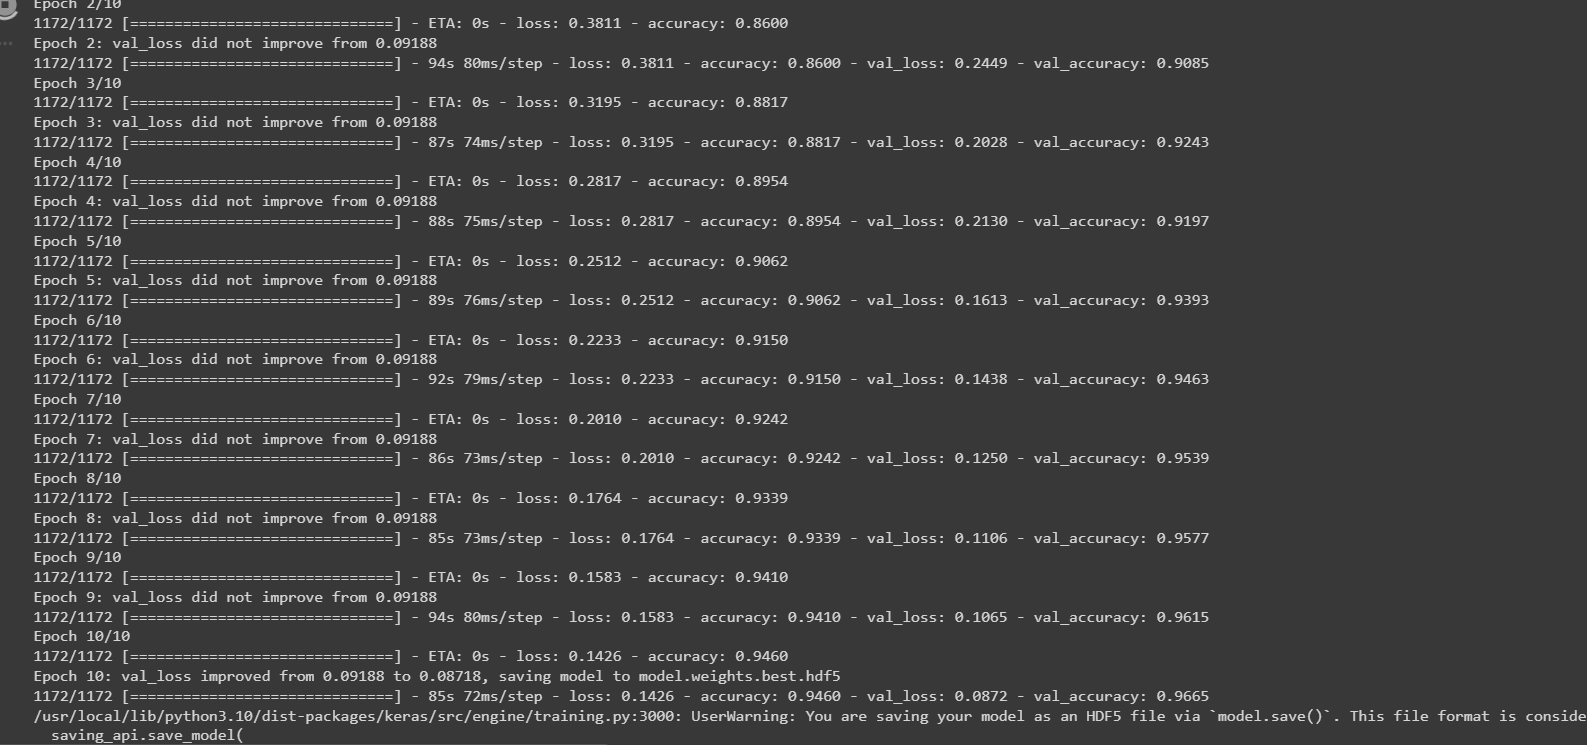

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.7360 - accuracy: 0.7910
Epoch 1: val_loss did not improve from 0.08497
1172/1172 [==============================] - 112s 95ms/step - loss: 0.7360 - accuracy: 0.7910 - val_loss: 0.3033 - val_accuracy: 0.8901
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3934 - accuracy: 0.8570
Epoch 2: val_loss did not improve from 0.08497
1172/1172 [==============================] - 91s 77ms/step - loss: 0.3934 - accuracy: 0.8570 - val_loss: 0.2476 - val_accuracy: 0.9063
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8760
Epoch 3: val_loss did not improve from 0.08497
1172/1172 [==============================] - 95s 81ms/step - loss: 0.3335 - accuracy: 0.8760 - val_loss: 0.2080 - val_accuracy: 0.9199
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8889
Epoch 4: val_loss did not improve from 0.08497
1172/1172 [===

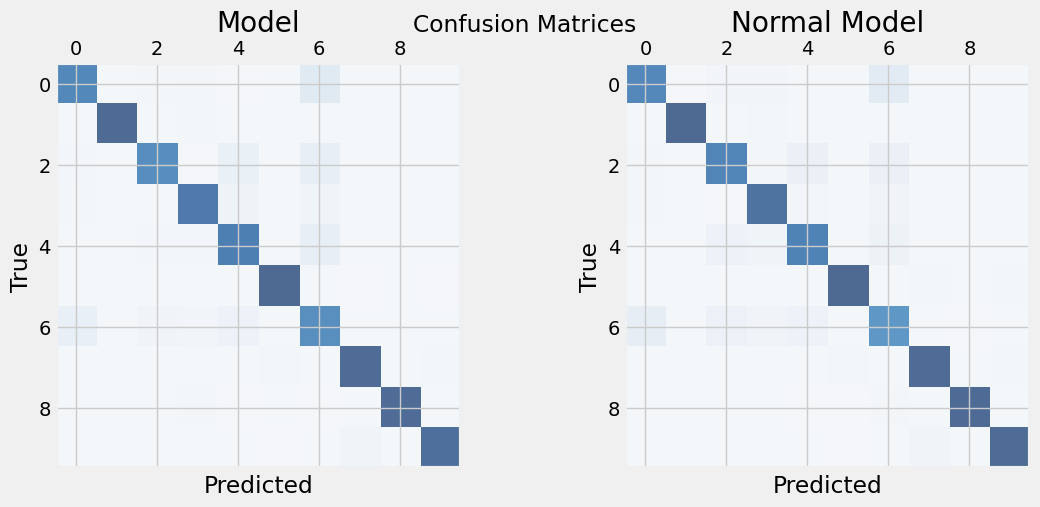

In [41]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Define and compile the 'normal' model
normal = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

normal.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the 'normal' model
normal.fit(combined_x_train, combined_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[checkpointer])

# Make predictions with 'model' and 'normal' on the test data
model_predictions = model.predict(x_test)
normal_predictions = normal.predict(x_test)

# Convert predicted probabilities to class labels
model_predictions_classes = np.argmax(model_predictions, axis=1)
normal_predictions_classes = np.argmax(normal_predictions, axis=1)

# True class labels
true_labels = y_test

# Calculate and compare accuracy
model_accuracy = accuracy_score(true_labels, model_predictions_classes)
normal_accuracy = accuracy_score(true_labels, normal_predictions_classes)

# Calculate and compare precision, recall, and F1-score
model_precision = precision_score(true_labels, model_predictions_classes, average='weighted')
normal_precision = precision_score(true_labels, normal_predictions_classes, average='weighted')

model_recall = recall_score(true_labels, model_predictions_classes, average='weighted')
normal_recall = recall_score(true_labels, normal_predictions_classes, average='weighted')

model_f1 = f1_score(true_labels, model_predictions_classes, average='weighted')
normal_f1 = f1_score(true_labels, normal_predictions_classes, average='weighted')

# Print the comparison of metrics
print("Comparison of Metrics:")
print(f"Model Accuracy: {model_accuracy:.4f}")
print(f"Normal Model Accuracy: {normal_accuracy:.4f}")
print(f"Model Precision: {model_precision:.4f}")
print(f"Normal Model Precision: {normal_precision:.4f}")
print(f"Model Recall: {model_recall:.4f}")
print(f"Normal Model Recall: {normal_recall:.4f}")
print(f"Model F1-score: {model_f1:.4f}")
print(f"Normal Model F1-score: {normal_f1:.4f}")

# Create confusion matrices and display them
model_cm = confusion_matrix(true_labels, model_predictions_classes)
normal_cm = confusion_matrix(true_labels, normal_predictions_classes)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Confusion Matrices')

# Model confusion matrix
axes[0].matshow(model_cm, cmap=plt.cm.Blues, alpha=0.7)
axes[0].set_title('Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Normal confusion matrix
axes[1].matshow(normal_cm, cmap=plt.cm.Blues, alpha=0.7)
axes[1].set_title('Normal Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.show()


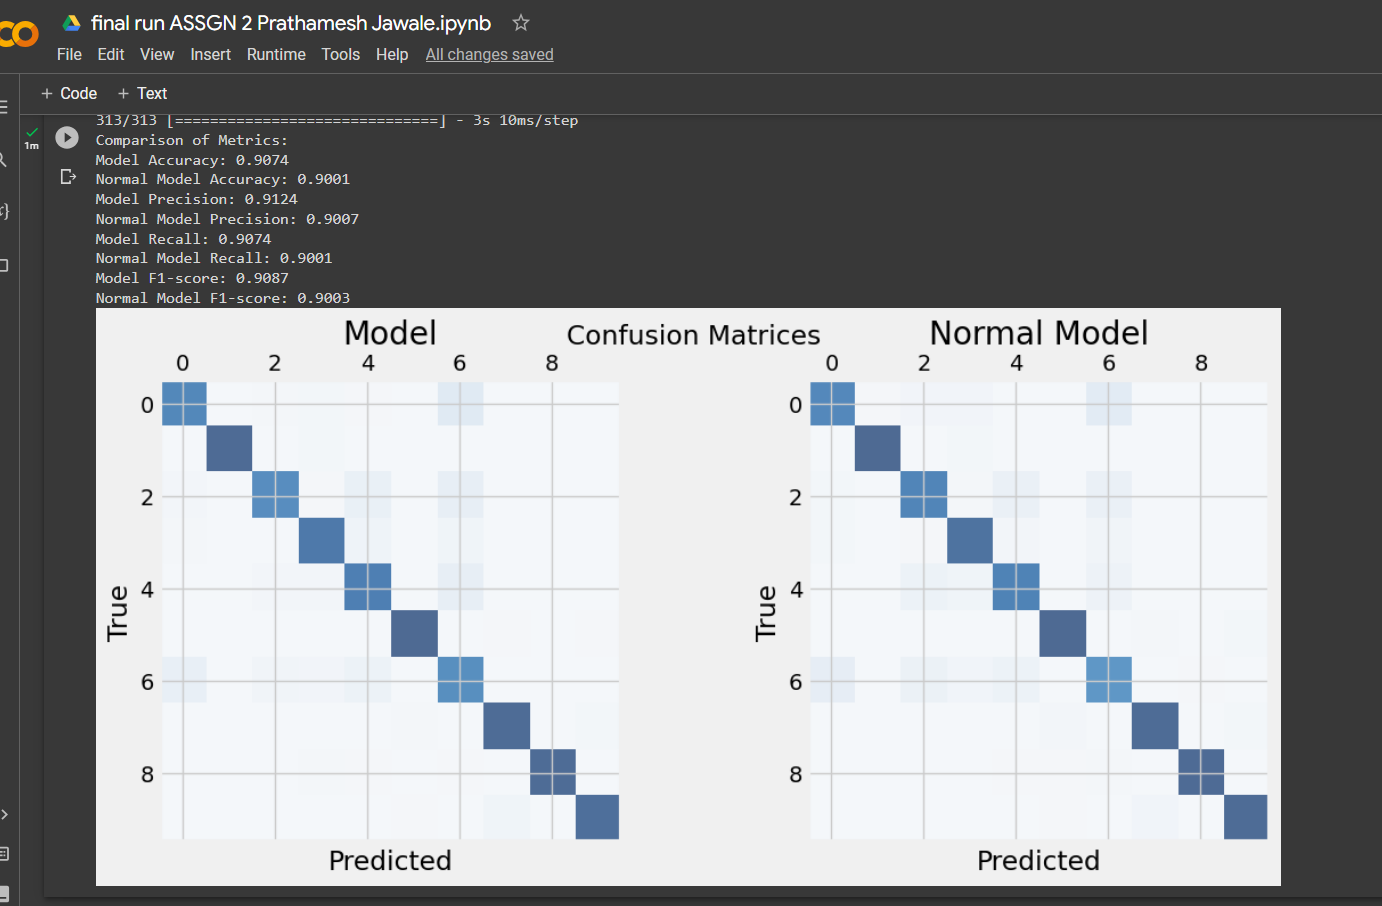